In [1]:
import numpy as np
import numpy.random as npr
import scipy.stats as stats

def q(x):
  return stats.norm.sf(x)

import matplotlib.pyplot as plt
%matplotlib inline

# Conditioning with Random Variables

It is commonly said that "all probabilities are conditional". That is true for random variables, too.  Random variables can depend on events or on other random variables. Let's start with the simplest case. We are given a random variable for which the distribution of the random variable depends on some other event. This will be most clear through an example:

**Motivating Example: Binary Communications**

In a binary communication system, a transmitter attempts to communicate a stream of bits to a receiver. The received signal is a noisy version of the transmitted signal. After some signal processing, the received signal is converted into a *decision statistic*, $X$, which is a random variable that can be used to decide whether the transmitted signal was a 0 or a 1. For the decision statistic to be useful in deciding which bit was transmitted, its distribution must change depending on which bit was transmitted. In many cases, $X$ is a Normal random variable, and the standard deviation of $X$ does not depend on which bit was transmitted. The mean will change depending on which bit was transmitted. Let's use the following model:

\begin{align*}
  \begin{cases}
  X  \sim \mbox{Normal}(+1,\sigma), & 0 \mbox{ transmitted}\\
  X  \sim \mbox{Normal}(-1,\sigma), & 1 \mbox{ transmitted}.
  \end{cases}
\end{align*}

Let $T_i$ denote the event that $i$ is transmitted.  Then can write a  conditional distribution function for $X$ given that $i$ was transmitted as

$$
F_X(x|T_i) = P(X \le x | T_i).
$$

We can then easily extend this to a conditional pdf, which is defined as the derivative of the conditional cdf,

$$
f_X(x|T_i) = \frac{d}{dx} F_X(x|T_i).
$$


An example of the conditional densities for this binary communication system example is shown below:

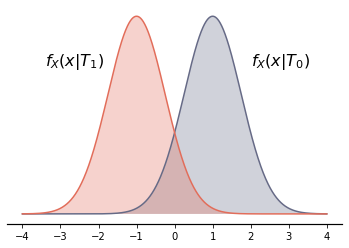

In [2]:
sigma=0.75
p0=1/2
G0=stats.norm(loc=1,scale=sigma)
G1=stats.norm(loc=-1,scale=sigma)
x=np.linspace(-4,4,1001)
p1=1-p0

# plot the weighted densities:
# these are proportional to the APPs
plt.plot(x,p0*G0.pdf(x))
plt.plot(x,p1*G1.pdf(x))

# Fill under the regions found above
plt.fill_between(x,p0*G0.pdf(x),alpha=0.3)
plt.fill_between(x,p1*G1.pdf(x),alpha=0.3)

ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([]);

plt.annotate('$f_X(x|T_0)$', (2,0.2), fontsize=16)
plt.annotate('$f_X(x|T_1)$', (-3.4,0.2), fontsize=16);

Now let's see how we can use conditional densities and distributions:

**Part a)** Calculate the probability that $X>2$ if $P(T_0)=0.25$ and $P(T_1)=0.75$ if $\sigma=2$

Now that we have the concept of conditional distributions, we have the tools to solve this type of problem. The first thing to realize is that the problem is that we do not know the distribution of $X$: **we only know conditional distributions of $X$ given $T_i$**. We can consider $T_i$ to be the hidden state in this problem.  To find $P(X>2)$, we can apply the Law of Total Probability, where we condition on the hidden state:

$$
P(X>2) = P(X>2|T_0)P(T_0) + P(X>2|T_1)P(T_1).
$$

We are given $P(T_0)$ and $P(T_1)$ in the problem statement, and we know that conditioned on a particular $T_i$, $X$ is Normal with some mean $\mu \in \{+1, -1\}$ and standard deviation $\sigma = 2$. Here are two different approaches to solve this problem using the conditional distributions:

1. We can uses SciPy.stats to create each of the conditional distributions and then use the built in methods to evaluate the probability. Start by creating the two conditional distributions:



In [3]:
XgivenT0 = stats.norm(1, 2)
XgivenT1 = stats.norm(-1, 2)

Then $P(X>2|T_i)$ is simply the survival function of $X$ using the conditional distribution given $T_i$. So, $P(X>2|T_0)$ can be evaluated as

In [4]:
XgivenT0.sf(2)

0.3085375387259869

Similarly, we can evaluate $P(X>2|T_1)$ as

In [5]:
XgivenT1.sf(2)

0.06680720126885807

Putting these values into the Total Probability expression gives the value for $P(X>2)$,

In [6]:
XgivenT0.sf(2) * 0.25 + XgivenT1.sf(2) * 0.75

0.12723978563314026

2. Suppose that we wanted to give an expression for $P(X>2)$ in terms of the $Q()$ function instead. We could rewrite the forms $P(X>2|T_0)$ in terms of conditional distribution functions, like $P(X>2|T_0) = 1 - P(X \le 2 |T_0) = 1- F_X(2|T_0)$.  It is more efficient to just realize that each conditional distribution is Normal, and thus we can directly apply our distance-based approaches to find the probabilities in terms of the $Q()$ function. Note that 2 is greater than either value of $\mu$, so we are evaluating the probabilities of two right tails, as shown in the plots below:

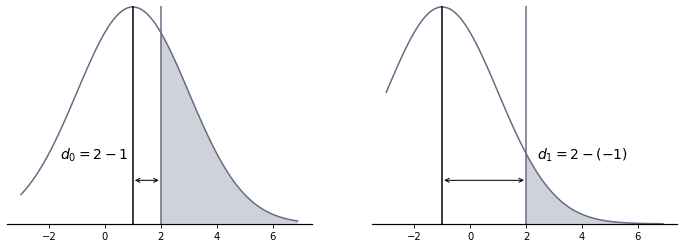

In [7]:
sigma=2
p0=1/2
means = [1, -1]
G0=stats.norm(loc=1,scale=sigma)
G1=stats.norm(loc=-1,scale=sigma)
x=np.arange(-3,7,0.1)
greater2 = np.arange(2, 7, 0.1)
p1=1-p0

fig, axs = plt.subplots(1,2, figsize=(12,4))
# plot the weighted densities:
# these are proportional to the APPs
axs[0].plot(x,p0*G0.pdf(x))
axs[1].plot(x,p1*G1.pdf(x))

# Fill under the regions found above
axs[0].fill_between(greater2,p0*G0.pdf(greater2),alpha=0.3)
axs[1].fill_between(greater2,p1*G1.pdf(greater2),alpha=0.3)

for i, ax in enumerate(axs):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.get_yaxis().set_ticks([]);
  ax.axvline(2)
  ax.axvline(means[i], color='black')
  ax.annotate('', xy=(means[i],0.02), xytext=(2, 0.02), xycoords='data',             
              arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"), )
  
  ax.set_ylim(0, 0.1)

axs[0].annotate('$d_0 = 2 - 1$', xy=(means[i],0.02), xytext=(-1.6, 0.03), xycoords='data', fontsize=14)
axs[1].annotate('$d_1 = 2 - (-1)$', xy=(means[i],0.02), xytext=(2.4, 0.03), xycoords='data', fontsize=14)



  
plt.annotate('$f_X(x|T_0)$', (2,0.2), fontsize=16)
plt.annotate('$f_X(x|T_1)$', (-3.4,0.2), fontsize=16);


The probability $P(X>2)$ is 

\begin{align}
P(X>2) &= Q\left(\frac{d_0}{\sigma} \right)(0.25) +
Q\left(\frac{d_1}{\sigma} \right)(0.75) \\
&=Q\left(\frac{1}{2} \right)(0.25) +
Q\left(\frac{3}{2} \right)(0.75) 
\end{align}


We can use our usual `q()` function to evaluate this probability:

In [8]:
q(1/2)*0.25+q(3/2)*0.75

0.12723978563314026

This result matches our previous answer.

**Part b)** Calculate the probability of the events $T_0$ and $T_1$ given that $X>2$ if $P(T_0)=0.25$ and $P(T_1)=0.75$ if $\sigma=2$. 

*Solution*

Let's just try to write down one of these probabilities and then apply our usual definition for evaluating a conditional probability,

\begin{align*}
P(T_0 | X>2) &= \frac{ P(T_0 \cap X>2) }{P(X>2)}.
\end{align*}

Since we do not directly know how to compute $P(T_0 \cap X>2)$, we need to rewrite it using the Chain Rule in terms of probabilities that we do know: $P(T_0 \cap X>2) = P(X>2|T_0) P(T_0)$. We have already shown how to calculate $P(X>2)$ using the Law of Total Probability. Putting these together, we get

\begin{align*}
P(T_0 | X>2) &= \frac{ P(X>2|T_0) P(T_0) }{P(X>2) }\\
&= \frac{ Q\left( \frac {2-1}{\sigma} \right) P(T_0) }{P(X>2)}.
\end{align*}

Then the error probability given the specified parameters is


In [9]:
q(1/2)*0.25/(q(1/2)*0.25+q(3/2)*0.75)

0.6062127839785253

The probability of $T_1$ given $X>2$ is 
\begin{align*}
P(T_1 | X>2) &= \frac{ P(X>2|T_1) P(T_1) }{P(X>2) }\\
&= \frac{ Q\left( \frac {2-(-1)}{\sigma} \right) P(T_0) }{P(X>2)}.
\end{align*}



In [10]:
q(3/2)*0.75/(q(1/2)*0.25+q(3/2)*0.75)

0.3937872160214748

Note that $P(T_0| X>2) + P(T_1|X>2) = 1$. This is expected, because $T_0$ and $T_1$ are complementary events.

**Part c)** Calculate the probability of the events $T_0$ and $T_1$ given that $X>=2$ if $P(T_0)=0.25$ and $P(T_1)=0.75$ if $\sigma=2$.

*Solution*

This looks a lot like the previous problem. If we try to apply the same technique as in Part b), we get the following expression for $P(T_0|X=2)$:

\begin{align*}
P(T_0 | X=2) &= \frac{ P(X=2|T_0) P(T_0) }{P(X=2) }\\
\end{align*}

This might look okay, except that $P(X=2|T_0)=0$. In addition, $P(X=2) = P(X=2|T_0)P(T_0) + P(X=2|T_1)P(T_1)=0$. So the result is $0/0$. The problem is that we are conditioning on an event that has zero probability. But keep in mind that every time that $X$ is received it takes on *some* value with zero probability. Being able to answer this type of question is important, but we don't have the math to deal with it yet. This type of conditional probability is called *point conditioning*:

````{panels}
DEFINITION
^^^
```{glossary}
point conditioning
    Point conditioning occurs for a conditional probability if the conditioning statement is (or includes) the event that a random variable is equal to a particular value. I.e., $P(A|X=x)$, where $X$ is a continuous random variable.
```
````



We can evaluate a conditional probability with *point conditioning*, by treating it as a limit and doing some careful manipulation:


\begin{eqnarray*}
P(A|X = x) \! \! &=& \underset{ \Delta x \rightarrow 0}{\lim} P(A| 
 x < X \le x+ \Delta x  )   \\
\!\!&=& \underset{ \Delta x \rightarrow 0}{\lim}
\frac{F_X(x + \Delta x |A)- F_X(x|A)}{F_X(x+\Delta x)-F_X(x)} 
P(A) \\
&=& \underset{ \Delta x \rightarrow 0}{\lim}
\frac{\frac{ F_X(x + \Delta x |A)- F_X(x|A)}{ \Delta x}}
{ \frac {F_X(x+\Delta x)-F_X(x)}{ \Delta x}} P(A) \\
&=& \frac{f_X(x|A)}{f_X(x)} P(A),
\end{eqnarray*}
if $f_X(x|A)$ and $f_X(x)$ exist, and $f_X(x) \ne 0$.

(The result looks like what you would do if you didn't know any better -- treat the densities as if they were probabilities, and everything works out!)







## Implications of Point Conditioning

Note that the form above is almost a Bayes' rule form: If $A$ is some input event and $f_X(x|A)$ is the likelihood of $X$ given $A$, then $P(A|X=x)$ is the *a posteriori* probability of $A$ given that the output of the system is $X=x$

However, we don't know how to calculate $f_X(x)$ yet


If  $\left\{A_i\right\}$ form a partition of $S$, then from our previous work on the Law of Total Probability, we have
\begin{align}
F_X(x) &= P(X \le x) \\
&= \sum_i P(X \le x| A_i) P(A_i) \\
&= \sum_i F_X(x|A_i) P(A_i)
\end{align}
    
Since $ f_X(x) = \frac{d}{dx} F_X(x)$ and $f_X(x|A_i) = \frac{d}{dx} F_X(x|A_i)$,
\begin{align}
f_X(x) &= \frac{d}{dx} F_X(x) \\
&= \frac{d}{dx}\sum_i F_X(x|A_i) P(A_i) \\
&= \sum_i \left[\frac{d}{dx} F_X(x|A_i) \right]P(A_i)  \\
&= \sum_i f_X(x|A_i) P(A_i) 
\end{align}
   
   **(Total Probability for Conditional Density Functions)**


* Note that 

 \begin{align*}
   &P(A|X = x) = \frac{f_X(x|A)}{f_X(x)} P(A) \\
   \mbox{ } \\
   \Rightarrow& P(A|X=x)f_X(x) = f_X(x|A)P(A) \\
   \mbox{ } \\
   \Rightarrow& \int_{-\infty}^{\infty} P(A|X=x)f_X(x) dx 
   =  \int_{-\infty}^{\infty} f_X(x|A) dx P(A) \\
 \Rightarrow& P(A) =\int_{-\infty}^{\infty} P(A|X=x)f_X(x) dx 
 \end{align*}
**(Continuous Version of Law of Total Probability)** 

 




**Point Conditioning Form of Baye's Rule:**

  If $\{A_i, ~i=0,1,\ldots, n-1\}$ form a partition of $S$, then
\begin{eqnarray*}
   P(A_i|X \!=\! x)  &~=~& \frac{f_X(x|A_i) P(A_i)}{
      \sum_{i=0}^{n-1}{f_X(x|A_i) P(A_i)}
      }
\end{eqnarray*}




## The Memoryless Property of the Exponential Distribution

In {doc}`important-continuous-rvs`, I gave a specific example where the time that had passed since a lightbulb was first in service did not seem to affect its future lifetime. Let's try to formalize and generalize this using conditional distribution functions.

Let $T$ be the lifetime of some device. (The same result applies if $T$ is instead a different type of time, such as the time waiting in a queue.) Let $T \sim$ exponential($\lambda$) for some $\lambda >0$. Now suppose that we are given $T>5$. Let's first evaluate the conditional distribution for $T$ given that $T>5$:

\begin{align}
F_T(t|T>5) &= P(T \le t | T>5)\\
 &= \frac{P(T \le t \cap T>5)}{P(T>5)}\\
\end{align}

The denominator is the easy part:

$$
P(T>5) = 1 -F_T(5) = e^{-5 \lambda}.
$$


Let's visualize the two cases that can occur for the numerator. If $t<5$, then the regions look like this:
```{image} figs/memoryless1.pdf
:alt: Number line illustrating events $T \le t$ and $T>5$ when $t<5$
:width: 300px
:align: center
```

Since there is no overlap between these two regions, the intersection is the null set, and $F_T(t|T>5)=0$ if $t<t$. I.e., the probability that the device last less than $t$ units, where $t< 5$, is 0 if we know that the device lasted at least 5 units.


If $t \ge 5$, the two regions in the numerator look like this:
```{image} figs/memoryless2.pdf
:alt: Number line illustrating events $T \le t$ and $T>5$ when $t\ge5$
:width: 300px
:align: center
```

From the figure, we can see that the numerator can be rewritten as $P(5<T \le t)$, which we can evaluate as

\begin{align*}
P(5 < T \le t) &= F_T(t) - F_T(5)\\
&= 1 - e^{-\lambda t} - \left( 1 - e^{ -\lambda(5)}\right) \\
&= e^{ -5\lambda}- e^{-\lambda t}
\end{align*}

Thus, for $t \ge 5$, 
\begin{align}
F_T(t|T>5) &= \frac{e^{ -5\lambda}- e^{-\lambda t}}{ e^{ -5\lambda} } \\
&= 1- e^{-\lambda (t-5)}
\end{align}

Overall the conditional distribution is

$$
F_T(t|T>5) =
\begin{cases}
0, & t < 5 \\
1- e^{-\lambda (t-5)}, & t \ge 5 .
\end{cases}
$$

It is helpful to plot the distribution of $T$ (with $lambda=1$) along with the conditional distribution of $T$ given $T \ge 5$:

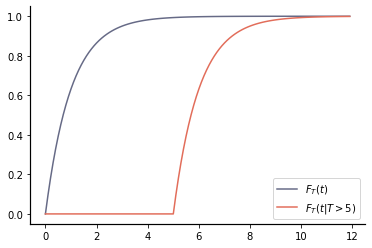

In [11]:
t=np.arange(0, 12, 0.1)

T=stats.expon()
plt.plot(t, T.cdf(t), label='$F_T(t)$')

FT = np.piecewise(t, [t<5, t>=5], [0, lambda x: 1-np.exp(-(x-5))] )
plt.plot(t, FT, label = '$F_T(t|T >5)$')
plt.legend();

The conditional cdf is simply a **shifted version of the original cdf**. 

Now we are ready to see why this creates a memoryless property. Instead of asking about the total lifetime of the device $T$ given that it has already lasted for 5 time units, let's ask about the remaining lifetime. Let $L$ be the remaining liftime. Given that the devices has lasted for time units, the remaining lifetime is $L=T-5$. Then

\begin{align}
F_L(l| T \ge 5) &= P(L \le l| T \ge 5) \\
&= P(T -5 \le l| T \ge 5) \\
&= P (T \le l+5| T \ge 5) \\
&= F_T(l +5| T \ge 5) \\
&=\begin{cases}
0, & (l+5)  < 5 \\
1- e^{-\lambda ((l+5)-5)}, & (l+5) \ge 5 
\end{cases}\\
&=\begin{cases}
0, & l  < 0 \\
1- e^{-\lambda (l)}, & l \ge 0 
\end{cases}\\
\end{align}

The remaining lifetime of the device given that it has already lasted 5 time units has the same exact cdf as the original lifetime of the device. And the result does not depend on the fact that we had conditioned on it lasting for 5 time units. We would get the same result for other values of time.  **No matter how long the device has lasted, its remaining lifetime has the same distribution as its original lifetime**. This is the memoryless property, and the exponential random variable is the only continuous random variable with this property. The Geometric random variable is the only discrete random variable with this property.

## Discussion

In this section, I introduced a lot of ideas and tools for working with random variables with conditioning because it is helpful to see this material while the on distribution and density functions is still fresh on your mind. I have deferred many of the examples and applications to later sections. In particular, {doc}`../10-conditional-stats/intro` uses this material for statistical tests. 

## Terminology Review

In [12]:
from jupytercards import display_flashcards

#display_flashcards('flashcards/'+'conditioning-with-rvs.json')

github='https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/'
github+='08-random-variables/flashcards/'
display_flashcards(github+'conditioning-with-rvs.json')


